# 1. Introduction

## Overview
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

*A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).*

You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

#### ```Approach 1: Polynomial approach```

What to train given:
* Rank of home team
* Rank of away team
* Tournament type

***Model 1:*** Predict how many goals the home team scores.

***Model 2:*** Predict how many goals the away team scores.

####  ```Approach 2: Logistic approach``` 

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### 1.1 Research Question
Given the rank of the home team, the rank of the away team, and the rank of the tournament type, predict:
* how many goals the home team scores
* how many goals the away team scores

Also, from the home team's perspective, use feature engineering to determine if the game is a Win, Lose, or Draw (W, L, or D)

### 1.2 Metric for Success
The model will be considered a success when it is able to correctly and accurately predict the respective scores, and determine whether the game is a win, lose, or draw. I'm setting the minimum accuracy level to be 80% because I feel like it's a good target score for accuracy.

### 1.3 Context
``` "After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking." ```

**Sources:** https://www.fifa.com/fifa-world-ranking/procedure/men , https://img.fifa.com/image/upload/edbm045h0udbwkqew35a.pdf

### 1.4 Experimental Design
I will carry out the following procedure to solve the research question:
    - load, merge, prepare, and clean the datasets
    - perform exploratory data analysis
    - perform polynomial and logistic regression
    - build the models and cross-validate them
    - interpret results obtained and use them to make conclusions
    - challenge my working
  

For the Polynomial Regression part, I intend to do the following:
<ul>
    <li>Carry out feature engineering, where applicable</li>
    <li>Check for multicollinearity</li>
    <li>Build an optimal model</li>
    <li>Cross validate the model</li>
    <li>Compute and interpret the RMSE</li>
    <li>Assess the heteroscedasticity</li>
</ul>

For Logistic Regression, I will carry out the following:
<ul>
    <li>Feature engineering, where necessary</li>
    <li>Train an optimal classifier</li>
    <li>Interpret the results</li>
    <li>Make a suitable prediction</li>
</ul>

### 1.5 Appropriateness of Data
I personally do not find the data used to be really appropriate. There was confusion as to what the dates in both datasets referred to. Also, a lot of data was lost during merging because both datasets did not have sufficient matching records.

The data can be found here: https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

# 2. Data Preparation & Cleaning

## 2.1 Working with the original data sets

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sp

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# to preview all columns
pd.set_option("display.max.columns", None)

In [3]:
# load fifa ranking dataset
fifa_ranking = pd.read_csv('fifa_ranking.csv')
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
# load results dataset
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# check basic information
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


There are no missing values in this dataset.

In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


There are no missing values in this dataset either.

In [7]:
# check for duplicates
duplicated = fifa_ranking[fifa_ranking.duplicated()]
duplicated.shape

(37, 16)

In [8]:
# deleting the duplicated values
fifa_ranking = fifa_ranking.drop_duplicates()

In [9]:
# get the shapes of both data sets
print("Fifa Ranking dataset shape:", fifa_ranking.shape)
print("Results dataset shape:", results.shape)

Fifa Ranking dataset shape: (57756, 16)
Results dataset shape: (40839, 9)


The "fifa_ranking" dataset has 57,756 records and 16 columns whereas the "results" dataset has 40,839 records and 9 columns.

## 2.2 Merging the two datasets

In [10]:
# merge the two datasets on the basis of date and home team
# we are keeping everything in the "results" dataset
dataset = results.merge(fifa_ranking, left_on = ['date', 'home_team'],
                        right_on = ['rank_date', 'country_full'], how = 'inner')
dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [11]:
dataset.drop(columns = ['country_full', 'country_abrv', 'total_points', 'previous_points', 'rank_change', 
                        'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
                        'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 
                        'three_year_ago_weighted'], axis = 1, inplace = True)

In [12]:
# since we merged the datasets using the home team/home country, we should rename the rank to 'home_rank'
dataset.rename(columns = {'rank' : 'home_rank'}, inplace = True)

In [13]:
# preview the new dataset
dataset.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,CONMEBOL,1993-08-08


In [14]:
# now to get the rank of the away team on the day of the match
dataset = dataset.merge(fifa_ranking, left_on = ['date', 'away_team'],
                        right_on = ['rank_date', 'country_full'], how = 'inner')

In [15]:
# rename the rank column to 'away_rank'
dataset.rename(columns = {'rank' : 'away_rank'}, inplace = True)

In [16]:
# remove the extra columns
dataset = dataset.drop(columns = ['confederation_x', 'rank_date_x','country_full',
       'country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation_y',
       'rank_date_y' ])

In [17]:
# previewing our final dataset
dataset.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,94


In [18]:
# check the shapes
print("Merged datasets shape:", dataset.shape)

# calculate how much data has been lost
lost = results.shape[0] - dataset.shape[0]
percent = (lost / results.shape[0]) * 100
print("Number of data samples lost:", lost)
print("Percent of data samples lost:", round(percent, 2))

Merged datasets shape: (871, 11)
Number of data samples lost: 39968
Percent of data samples lost: 97.87


In [19]:
# check for missing values
dataset.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
home_rank     0
away_rank     0
dtype: int64

There are no missing values.

In [20]:
# check for duplicated records
duplicatedData = dataset[dataset.duplicated()]
duplicatedData

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,away_rank


There are no duplicated records either.

# 3. Exploratory Data Analysis & Feature Engineering

In [21]:
# view descriptive statistics
dataset.describe(include = 'all')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,away_rank
count,871,871,871,871.000000,871.000000,871,871,871,871,871.000000,871.000000
unique,157,160,159,NaN,NaN,38,399,153,2,NaN,NaN
top,2010-08-11,Mexico,Uruguay,NaN,NaN,Friendly,Doha,United States,False,NaN,NaN
freq,45,23,15,NaN,NaN,574,14,34,733,NaN,NaN
mean,NaN,NaN,NaN,1.632606,1.004592,NaN,NaN,NaN,NaN,65.549943,69.918485
std,NaN,NaN,NaN,1.905960,1.154691,NaN,NaN,NaN,NaN,47.557993,50.497652
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,27.000000,28.000000
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,58.000000,61.000000
75%,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,95.000000,102.500000


False    733
True     138
Name: neutral, dtype: int64


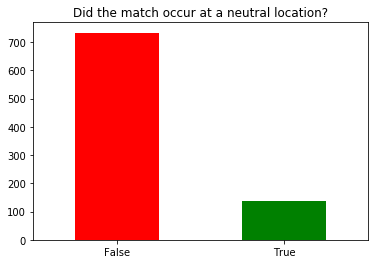

In [22]:
# what is the distribution of whether a location was neutral or not like?
dataset.neutral.value_counts().plot(kind = 'bar', color = ('red', 'green'), rot = 0)
plt.title("Did the match occur at a neutral location?")
print(dataset.neutral.value_counts())

We can see that very few matches occured at neutral locations. We can look into whether being on "enemy territory" affected performance.

1     264
0     224
2     205
3      97
4      35
5      23
6       8
8       4
7       4
9       3
31      1
15      1
11      1
10      1
Name: home_score, dtype: int64

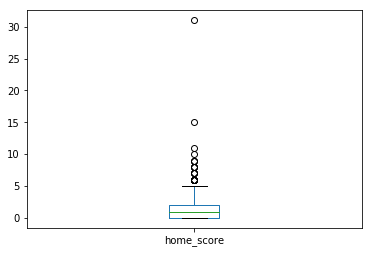

In [23]:
# checking for outliers
dataset.home_score.plot(kind ="box")

dataset.home_score.value_counts()

0    353
1    292
2    148
3     47
4     20
5      5
6      3
7      2
9      1
Name: away_score, dtype: int64

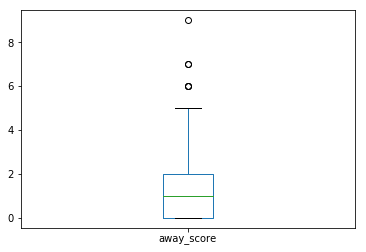

In [24]:
dataset.away_score.plot(kind ="box")

dataset.away_score.value_counts()

In [25]:
# remove outliers using IQR method

Q3 = dataset.quantile(0.75)
Q1 = dataset.quantile(0.25)
IQR = Q3 - Q1

IQR


dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(709, 11)

After removing the outliers, we are now down to 709 records.

Text(0.5, 1.0, 'Did the match occur at a neutral location?')

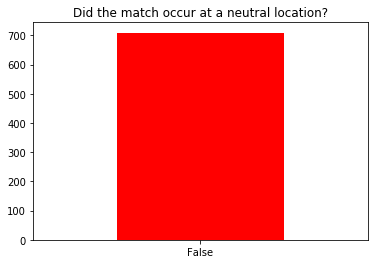

In [26]:
dataset.neutral.value_counts().plot(kind = 'bar', color = ('red', 'green'), rot = 0)
plt.title("Did the match occur at a neutral location?")

After removing the outliers, we see that all the matches left in our dataset did not occur in the home team's location. This raises the possibility that some of the matches that  were not played in neutral locations might have been rigged or the scores for those matches were altered.

In [27]:
# let's see the different types of tournaments
dataset.tournament.value_counts()

Friendly                                      490
FIFA World Cup qualification                  114
UEFA Euro qualification                        34
AFC Asian Cup qualification                    29
AFF Championship                                5
African Cup of Nations qualification            5
Gulf Cup                                        4
Cyprus International Tournament                 3
King's Cup                                      2
SAFF Cup                                        2
United Arab Emirates Friendship Tournament      2
CECAFA Cup                                      2
Prime Minister's Cup                            1
UAFA Cup                                        1
Confederations Cup                              1
CFU Caribbean Cup qualification                 1
Intercontinental Cup                            1
African Cup of Nations                          1
COSAFA Cup                                      1
AFC Asian Cup                                   1


There are so many different tournament types. I am not a football fan, so I do not know whether there is a difference between a Championship, a Cup, and a Tournament. I am assuming that the one thing they have in common is that they are all not friendly matches so we'll group them accordingly.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98d74a8e48>],
      dtype=object)

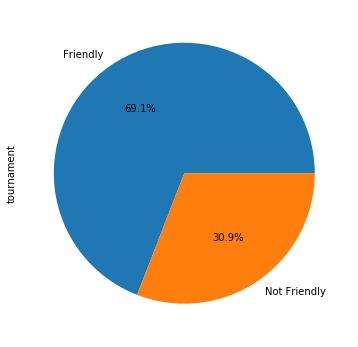

In [28]:
dataset.loc[dataset.tournament != 'Friendly', 'tournament'] = 'Not Friendly'
dataset.tournament.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [8, 6],
                                       subplots = True)

As we can see, the number of friendly matches far outnumber those of the non-friendly matches, which makes our dataset biased.

In [29]:
# add a column that determines whether the home team won, lost, or had a draw with the away team

conditions = [
    (dataset.home_score > dataset.away_score),
    (dataset.home_score < dataset.away_score),
    (dataset.home_score == dataset.away_score)
]
choices = ['win', 'lose', 'draw']

dataset['win_loss_draw'] = np.select(conditions, choices)
dataset.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,away_rank,win_loss_draw
0,1993-08-08,Bolivia,Uruguay,3,1,Not Friendly,La Paz,Bolivia,False,59,22,win
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,14,draw
2,1993-08-08,Ecuador,Venezuela,5,0,Not Friendly,Quito,Ecuador,False,35,94,win
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,86,win
4,1993-08-08,Paraguay,Argentina,1,3,Not Friendly,Asunción,Paraguay,False,67,5,lose


win     338
draw    192
lose    179
Name: win_loss_draw, dtype: int64


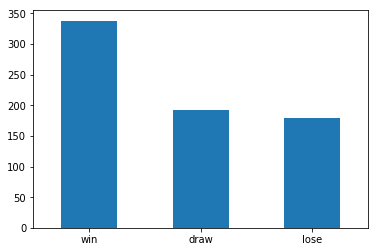

In [30]:
# let's see the distribution of the scores from the home team's perspective
dataset.win_loss_draw.value_counts().plot(kind = 'bar', rot = 0)
print(dataset.win_loss_draw.value_counts())

Majority of the matches resulted in the home team winning, while around half of that number resulted in either a draw or a win.

[Text(0, 0.5, 'Win, Lose, or Draw'),
 Text(0.5, 1.0, 'Distribution of Outcomes depending on Tournament')]

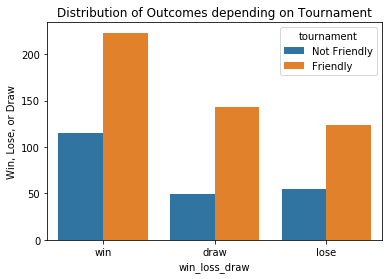

In [31]:
# how did the home team perform depending on the tournament type?
home = sb.countplot('win_loss_draw', hue = 'tournament', data = dataset)
home.set(title = "Distribution of Outcomes depending on Tournament",
        ylabel = "Win, Lose, or Draw")

It looks like the home team's performance is really good when the match is friendly. And, even in non-friendly matches such as tournaments and championships, the home team manages to win more than the visiting team. This shows that tournament type is not as big an impact on the outcome as I thought although friendly matches certainly do make winning easier.

In [32]:
# drop the 'country' and 'neutral' columns because we no longer need them
dataset.drop(columns = ['city', 'country', 'neutral'], inplace = True)

In [33]:
# saving our dataset in case of irreversible errors
dataset.to_csv('ready_dataset.csv', index = False)

In [34]:
# loading our new modified dataset
dataset = pd.read_csv('ready_dataset.csv')
dataset.tail()

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,win_loss_draw
704,2018-06-07,England,Costa Rica,2,0,Friendly,12,23,win
705,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,14,95,win
706,2018-06-07,Portugal,Algeria,3,0,Friendly,4,66,win
707,2018-06-07,Iceland,Ghana,2,2,Friendly,22,47,draw
708,2018-06-07,India,New Zealand,1,2,Not Friendly,97,120,lose


# 4. Polynomial Regression

### 4.1 The Question

What to train given:
* Rank of home team
* Rank of away team
* Tournament type

***Model 1:*** Predict how many goals the home team scores.

***Model 2:*** Predict how many goals the away team scores.

### 4.2 Feature Engineering

We need to encode our categorical variables in order to carry out regression with them.
We will use LabelEncoder for this.

In [35]:
# working on the 'tournament' column

le_tournament = LabelEncoder().fit(dataset['tournament'].unique())

class_tournament = le_tournament.classes_

dataset['tournament'] = le_tournament.transform(dataset['tournament'].values)


In [36]:
# working on the 'win_loss_draw' column
le_outcome = LabelEncoder().fit(dataset['win_loss_draw'].unique())

class_outcome = le_outcome.classes_

dataset['win_loss_draw'] = le_outcome.transform(dataset['win_loss_draw'].values)

In [37]:
# let's preview our modified dataset
dataset.tail()

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,win_loss_draw
704,2018-06-07,England,Costa Rica,2,0,0,12,23,2
705,2018-06-07,Uruguay,Uzbekistan,3,0,0,14,95,2
706,2018-06-07,Portugal,Algeria,3,0,0,4,66,2
707,2018-06-07,Iceland,Ghana,2,2,0,22,47,0
708,2018-06-07,India,New Zealand,1,2,1,97,120,1


In [38]:
# if we want to check what an encoded value represents, we just find it in the respective class list
# like this:
print(class_tournament[1])
print(class_outcome[2])

Not Friendly
win


### 4.3 Checking for Multicollinearity

In [39]:
# first we get the correlations
corr = dataset.corr()
corr

,home_score,away_score,tournament,home_rank,away_rank,win_loss_draw
home_score,1.000000,-0.099387,0.044133,-0.109400,0.243599,0.563621
away_score,-0.099387,1.000000,-0.047003,0.063842,-0.195406,-0.246870
tournament,0.044133,-0.047003,1.000000,0.240629,0.293178,0.075989
home_rank,-0.109400,0.063842,0.240629,1.000000,0.523705,-0.059115
away_rank,0.243599,-0.195406,0.293178,0.523705,1.000000,0.199186
win_loss_draw,0.563621,-0.246870,0.075989,-0.059115,0.199186,1.000000


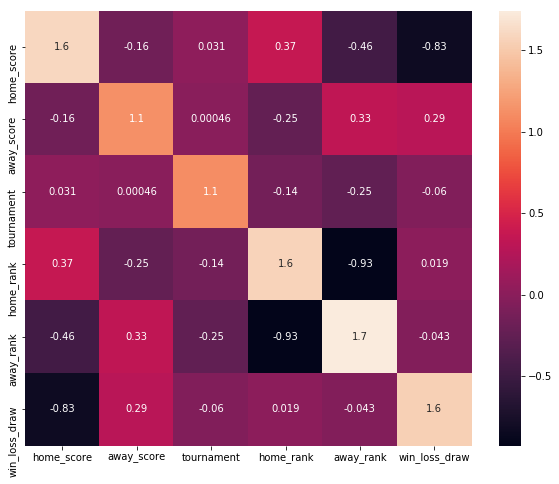

In [40]:
# then we get the Variance Inflation Factor (VIF)
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (10,8))
sb.heatmap(vif, annot = True)

As we can see, the VIF scores for each column are very low (below 5). This shows that there is very low correlation between the variables.The 'away_rank' column shows the highest VIF of all the variables in this dataset, but it is not so worrying that we have to remove it. As a result, we can proceed with building our model.

### 4.4 Model 1: Predict Home Scores

In [41]:
# getting our attributes and labels
X_home = np.array(dataset[['home_rank', 'away_rank', 'tournament']])
y_home = dataset['home_score']
print(X_home.shape)
print(y_home.shape)

(709, 3)
(709,)


In [42]:
# fitting the Linear Regression model to our dataset
reg_line_home = LinearRegression()
reg_line_home.fit(X_home, y_home)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# getting our training and testing sets
X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, 
                                                    test_size = 0.2, random_state = 0)

In [44]:
y_home_train.shape

(567,)

In [45]:
# fitting a polynomial regression to our data
poly_reg_home = PolynomialFeatures(degree = 5)
X_poly_home = poly_reg_home.fit_transform(X_home)

In [46]:
# fitting a linear regression to our polynomial regression
lin_reg_home = LinearRegression()
lin_reg_home.fit(X_poly_home, y_home)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# using home rank 12, away rank 5, and tournament 0 (Friendly)

# predict using linear regression
lin_pred_home = reg_line_home.predict([[12, 5, 0]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):", lin_pred_home)

# predict using polynomial regression
poly_pred_home = lin_reg_home.predict(poly_reg_home.fit_transform([[12, 5, 0]]))
print("Polynomial Prediction: %d" %poly_pred_home)
print("Polynomial Prediction (accurate):", poly_pred_home)

Linear Prediction: 1
Linear Prediction (accurate): [1.24726153]
Polynomial Prediction: 1
Polynomial Prediction (accurate): [1.25588194]


An example of Home Rank 12, Away Rank 5, and a friendly match resulted in the home team scoring one goal. Let us try another example, this time using one of the last records to predict the home score.

In [48]:
dataset.tail()

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,win_loss_draw
704,2018-06-07,England,Costa Rica,2,0,0,12,23,2
705,2018-06-07,Uruguay,Uzbekistan,3,0,0,14,95,2
706,2018-06-07,Portugal,Algeria,3,0,0,4,66,2
707,2018-06-07,Iceland,Ghana,2,2,0,22,47,0
708,2018-06-07,India,New Zealand,1,2,1,97,120,1


In [49]:
# we'll use the match between Uruguay and Uzbekistan (index 705)
# so Home Rank 14, Away rank 95, and Tournament Type 0

# predict using linear regression
lin_pred_home2 = reg_line_home.predict([[14, 95, 0]])
print("Linear Prediction: %d" %lin_pred_home2)
print("Linear Prediction (accurate):", lin_pred_home2)

# predict using polynomial regression
poly_pred_home2 = lin_reg_home.predict(poly_reg_home.fit_transform([[14, 95, 0]]))
print("Polynomial Prediction: %d" %poly_pred_home2)
print("Polynomial Prediction (accurate):", poly_pred_home2)

Linear Prediction: 2
Linear Prediction (accurate): [2.18894794]
Polynomial Prediction: 2
Polynomial Prediction (accurate): [2.68499544]


Both models returned 2 instead of the correct value (3). So the models are doing good but could be better.

##### 4.4.1 Cross-Validating Model 1

In [50]:
# we will use k-fold cross validation with the standard 5 folds
folds = KFold(n_splits = 5)

In [51]:
# first assess the accuracy of that model

regressor_home = LinearRegression()
regressor_home.fit(X_home_train, y_home_train)

y_predict_home = regressor_home.predict(X_home_test)

print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_home_test, y_predict_home)))

Root Mean Squared Error: 1.20029938893442


In [52]:
# create array to store the RMSE values of each fold
RMSES_home = []

# create a counter
count_home = 1

for train_index, test_index in folds.split(X_home):
    print("\nTraining model " + str(count_home))
    
    X_home_train, X_home_test = X_home[train_index], X_home[test_index]
    y_home_train, y_home_test = y_home[train_index], y_home[test_index]
    
    # fit a regression model accordingly
    reg_home = LinearRegression()
    reg_home.fit(X_home_train, y_home_train)
    
    # assess the accuracy of the model
    y_home_pred = reg_home.predict(X_home_test)
    
    rmse_value_home = np.sqrt(metrics.mean_squared_error(y_home_test, y_home_pred))
    RMSES_home.append(rmse_value_home)
    
    print('Model ' + str(count_home) + ' Root Mean Squared Error:',rmse_value_home)
    count_home += 1


Training model 1
Model 1 Root Mean Squared Error: 1.2576352631320842

Training model 2
Model 2 Root Mean Squared Error: 1.168393693365753

Training model 3
Model 3 Root Mean Squared Error: 1.1261004523852056

Training model 4
Model 4 Root Mean Squared Error: 1.0932397460979064

Training model 5
Model 5 Root Mean Squared Error: 1.1959736436288844


The first model's RMSE is the largest RMSE value of all our models, followed by the RMSE value of our model then the rest of the models from the k-folds. This shows that there are outliers from the main dataset which have been distributed across all the models.

In [53]:
# calculating the average RMSE value of the RMSE values created by the k-folds
np.mean(RMSES_home)

1.1682685597219666

The mean of the RMSE array is smaller than that of our initial RMSE, but it's close to that of the second model.

##### 4.4.2 Residual Plots and Heteroscedasticity Test for Model 1

In [54]:
# set prediction
home_reg = LinearRegression()
home_reg.fit(X_home_train, y_home_train)
home_predict = home_reg.predict(X_home_test)

In [55]:
# creating residuals
residuals_home = np.subtract(home_predict, y_home_test)

# let's preview our residuals
residuals_home.head()

568   -1.076505
569    0.488491
570   -0.358410
571   -2.584394
572    0.658368
Name: home_score, dtype: float64

In [56]:
residuals_home.describe()

count    141.000000
mean       0.106942
std        1.195429
min       -3.127683
25%       -0.650290
50%        0.229223
75%        0.895631
max        2.404547
Name: home_score, dtype: float64

In [57]:
# let's conduct a Bartlett's test for heteroscedasticity
test_result_home, p_value_home = sp.stats.bartlett(home_predict, residuals_home)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom_home = len(home_predict) - 1
probability_home = 1 - p_value_home

critical_value_home = sp.stats.chi2.ppf(probability_home, degree_of_freedom_home)
print(critical_value_home)

inf


If the test_result is greater than the critical value, then we reject our null hypothesis. This would mean that there are patterns to the variance of the data.

Otherwise, we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data.

In [58]:
if (test_result_home > critical_value_home):
  print("The variances are heterogeneous, and the model needs to be reassessed.")
else:
  print("The variances are homogeneous. The model passes the test.")


The variances are homogeneous. The model passes the test.


### 4.5 Model 2: Predict Away Scores

In [59]:
# getting our attributes and labels
X_away = np.array(dataset[['home_rank', 'away_rank', 'tournament']])
y_away = dataset['away_score']
print(X_away.shape)
print(y_away.shape)

(709, 3)
(709,)


In [60]:
# fitting the Linear Regression model to our dataset
reg_line_away = LinearRegression()
reg_line_away.fit(X_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# getting our training and testing sets
X_train_away,  X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, 
                                                    test_size = 0.2, random_state = 0)


In [62]:
# fitting a polynomial regression to our data
poly_reg_away = PolynomialFeatures(degree = 5)
X_poly_away = poly_reg_away.fit_transform(X_away)

In [63]:
# fitting a linear regression to our polynomial regression
lin_reg_away = LinearRegression()
lin_reg_away.fit(X_poly_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# using home rank 12, away rank 5, and tournament 0 (Friendly), like the example in the
# first model

# predict using linear regression
lin_pred_away = reg_line_away.predict([[5, 12, 0]])
print("Linear Prediction: %d" %lin_pred_away)
print("Linear Prediction (accurate):", lin_pred_away)

# predict using polynomial regression
poly_pred_away = lin_reg_away.predict(poly_reg_away.fit_transform([[5, 12, 0]]))
print("Polynomial Prediction: %d" %poly_pred_away)
print("Polynomial Prediction (accurate):", poly_pred_away)

Linear Prediction: 1
Linear Prediction (accurate): [1.01651431]
Polynomial Prediction: 1
Polynomial Prediction (accurate): [1.00052776]


An example of Home Rank 12, Away Rank 5, and a friendly match resulted in the away team scoring only one goal.

In case this is coincidental, let's get the last record of our dataset and see whether the model will be able to predict the away score.

In [65]:
dataset.tail()

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,win_loss_draw
704,2018-06-07,England,Costa Rica,2,0,0,12,23,2
705,2018-06-07,Uruguay,Uzbekistan,3,0,0,14,95,2
706,2018-06-07,Portugal,Algeria,3,0,0,4,66,2
707,2018-06-07,Iceland,Ghana,2,2,0,22,47,0
708,2018-06-07,India,New Zealand,1,2,1,97,120,1


In [66]:
# so we'll use Home Rank 97, Away Rank 120, and tournament 1

# predict using linear regression
lin_pred_away2 = reg_line_away.predict([[97, 120, 1]])
print("Linear Prediction: %d" %lin_pred_away2)
print("Linear Prediction (accurate):", lin_pred_away2)

# predict using polynomial regression
poly_pred_away2 = lin_reg_away.predict(poly_reg_away.fit_transform([[97, 120, 1]]))
print("Polynomial Prediction: %d" %poly_pred_away2)
print("Polynomial Prediction (accurate):", poly_pred_away2)

Linear Prediction: 0
Linear Prediction (accurate): [0.75342337]
Polynomial Prediction: 0
Polynomial Prediction (accurate): [0.82567393]


The model did not return the correct value (2) or even come close to it, so there was a problem somewhere. Either the models are not appropriate for this problem, the independent variables are not relevant or appropriate for these regression models, or there was a problem during the process.

##### 4.5.1 Cross-validating Model 2

In [67]:
# first assess the accuracy of that model
regressor_away = LinearRegression()
regressor_away.fit(X_train_away, y_train_away)

y_predict_away = regressor_away.predict(X_test_away)

print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_away, y_predict_away)))

Root Mean Squared Error: 1.125334293954114


In [68]:
# create array to store the RMSE values of each fold
RMSES_away = []

# create a counter
count_away = 1

for train_index, test_index in folds.split(X_away):
    print("\nTraining model " + str(count_away))
    
    X_away_train, X_away_test = X_away[train_index], X_away[test_index]
    y_away_train, y_away_test = y_away[train_index], y_away[test_index]
    
    # fit a regression model accordingly
    reg_away = LinearRegression()
    reg_away.fit(X_away_train, y_away_train)
    
    # assess the accuracy of the model
    y_away_pred = reg_away.predict(X_away_test)

    rmse_value_away = np.sqrt(metrics.mean_squared_error(y_away_test, y_away_pred))
    RMSES_away.append(rmse_value_away)
    
    print('Model ' + str(count_away) + ' Root Mean Squared Error:',rmse_value_away)
    count_away += 1


Training model 1
Model 1 Root Mean Squared Error: 1.0000064859739377

Training model 2
Model 2 Root Mean Squared Error: 1.1325814084565446

Training model 3
Model 3 Root Mean Squared Error: 0.9848908457187839

Training model 4
Model 4 Root Mean Squared Error: 0.9583437655203897

Training model 5
Model 5 Root Mean Squared Error: 0.8919709045452252


The RMSE value of our second model is the largest RMSE value of all our models, followed by the RMSE value of our original model and then that of the first model. This signifies the presence of outliers from the main dataset in all three models.

In [69]:
# calculating the average RMSE value of the RMSE values created by the k-folds
np.mean(RMSES_away)

0.9935586820429763

The mean of the RMSE array is smaller than our initial RMSE.

##### 4.5.2 Residual Plots and Heteroscedasticity Test for Model 2

In [70]:
# set prediction
away_reg = LinearRegression()
away_reg.fit(X_train_away, y_train_away)
away_predict = away_reg.predict(X_test_away)

In [71]:
# creating residuals
residuals_away = np.subtract(away_predict, y_test_away)

# let's preview our residuals
residuals_away.head()

540    0.022764
467    1.037150
355   -1.422636
172   -0.249191
637   -2.728918
Name: away_score, dtype: float64

In [72]:
residuals_away.describe()

count    142.000000
mean      -0.233404
std        1.104760
min       -4.220329
25%       -0.930239
50%       -0.000322
75%        0.631420
max        1.618219
Name: away_score, dtype: float64

In [73]:
# let's conduct a Bartlett's test for heteroscedasticity
test_result_away, p_value_away = sp.stats.bartlett(away_predict, residuals_away)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom_away = len(away_predict) - 1
probability_away = 1 - p_value_away

critical_value_away = sp.stats.chi2.ppf(probability_away, degree_of_freedom_away)
print(critical_value_away)

inf


If the test_result is greater than the critical value, then we reject our null hypothesis. This would mean that there are patterns to the variance of the data.

Otherwise, we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data.

In [74]:
if (test_result_away > critical_value_away):
  print("The variances are heterogeneous, and the model needs to be reassessed.")
else:
  print("The variances are homogeneous. The model passes the test.")


The variances are homogeneous. The model passes the test.


# 5. Logistic Regression

### 5.1 The Question

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### 5.2 Feature Engineering

This has already been done in the "Polynomial Regression" section, so there's no need to do it again. For the logistic approach question, we will work with the encoded *'win_loss_draw'* column.

### 5.3 Training an optimal classifier

In [75]:
# since we want to predict whether a match is a win, lose, or draw from the perspective
# of the home team, our target variable will be the 'win_loss_draw' column
wld_prediction = dataset.drop(columns = ['date', 'home_team', 'away_team', 'tournament',
                                         'home_rank', 'away_rank'])
wld_prediction.head()

,home_score,away_score,win_loss_draw
0,3,1,2
1,1,1,0
2,5,0,2
3,1,0,2
4,1,3,1


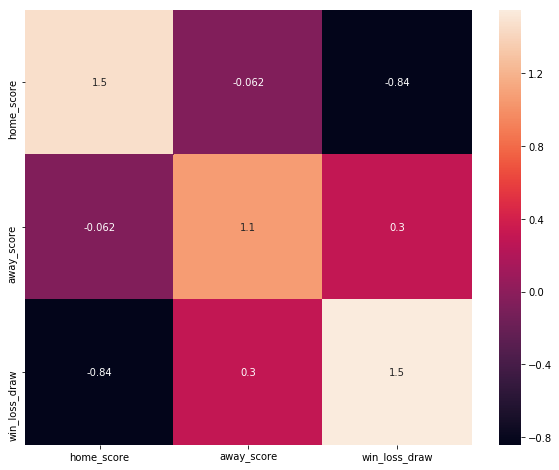

In [76]:
# check for multicollinearity between the variables
wld_vif = pd.DataFrame(np.linalg.inv(wld_prediction.corr().values), index = wld_prediction.corr().index,
                      columns = wld_prediction.corr().columns)

plt.figure(figsize = (10,8))
sb.heatmap(wld_vif, annot = True)

All VIF scores are way below 5, so it is safe to proceed with this dataset.

In [77]:
# setting up our train and test sets

X_wld = wld_prediction.drop('win_loss_draw', axis = 1)
y_wld = wld_prediction['win_loss_draw']

print(X_wld.shape)
print(y_wld.shape)

(709, 2)
(709,)


In [78]:
# splitting our data 80:20
X_wld_train, X_wld_test, y_wld_train, y_wld_test = train_test_split(X_wld, y_wld,
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [79]:
# fitting our model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_wld_train, y_wld_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### 5.4 Making predictions

In [80]:
# I will use KNN
knn = KNeighborsClassifier(n_neighbors = 1)

In [81]:
knn.fit(X_wld_train, y_wld_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [82]:
# example
# suppose home team scores 7 goals and away team scores 3 (we want to get a 'win')
X_example = np.array([[7, 3]])
X_example

array([[7, 3]])

In [83]:
prediction = knn.predict(X_example)
print("Result of prediction:", prediction)

Result of prediction: [2]


In [84]:
# decoding our prediction using the outcome class we had set up earlier
print("Outcome of the match:", class_outcome[prediction])

Outcome of the match: ['win']


In [85]:
# let's try again with a home score of 3 and an away score of 3 and see if we can get a 'draw'
X_example_2 = np.array([[3, 3]])
prediction2 = knn.predict(X_example_2)
print("Match outcome:", class_outcome[prediction2])

Match outcome: ['draw']


In [86]:
# how accurate is our model?
prediction_score = knn.score(X_wld_test, y_wld_test)
prediction_score

0.9788732394366197

From this, we see that our model is accurate approximately 97.88% of the time. While accuracy alone is not sufficient to conclude whether the model is actually good or not, I'd say it's a really good option to settle with for the time being until a better model can be made.

### 5.5 Cross Validating the Model

In [87]:
# cross-validating the logistic regression model using the cross_val_score method
score = cross_val_score(LogisticRegression(solver='liblinear', multi_class = 'auto'), X_wld, y_wld, cv = 3)
score

array([1.        , 0.98728814, 1.        ])

In [88]:
# assessing the accuracy of our model
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 1.00 (+/- 0.01)


We see here that our model is very accurate at predicting whether the match will be a win, loss, or draw given the home and away scores.

# 6. Conclusion

In conclusion, we see that tournament type, home rank, and away rank do not really influence the home or away scores by a large margin. Either the models used were not really good at predicting the scores, the variables actually do not influence them, or I did something wrong during the process.

When it comes to the logistic regression question, however, I can say that my Logistic regression model performed really well and with 100% accuracy.

# 7. Challenging the Solution

I believe that a better model than polynomial regression should have been used. Also, the data sets need to be more completed and less biased (e.g., a very large majority of the matches were friendly, and also did not take place in neutral locations) so that there is not so much loss of data when merging the two datasets. Furthermore, better understanding of how to interpret and improve results such as RMSE values is needed.

Next time I should also try to figure out a way to extensively explore the relationship between ranks and scores. I should also try splitting the matches according to regions (e.g. country or continent) and/or confederations, and see if there's an influence on ranking and scores.